# Part 1: Data Preparation and Exploration

Step 1: Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

In [5]:
# Display the first few rows
print(df.head())

            Ex_rate
date               
1990-01-01   0.7855
1990-02-01   0.7818
1990-03-01   0.7867
1990-04-01   0.7860
1990-05-01   0.7849


Step 2: Initial Exploration

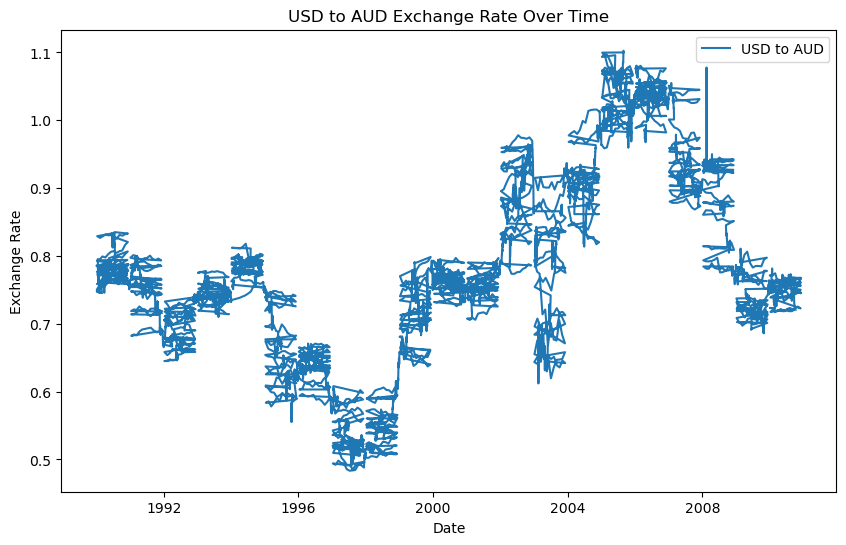

In [7]:
# Plot the time series for USD to AUD exchange rate
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

Step 3: Data Preprocessing

In [8]:
# Check for missing values
print(df.isna().sum())

Ex_rate    0
dtype: int64


# Part 2: Model Building - ARIMA

In [35]:
Step 1: Parameter Selection for ARIMA

SyntaxError: invalid syntax (3064562162.py, line 1)

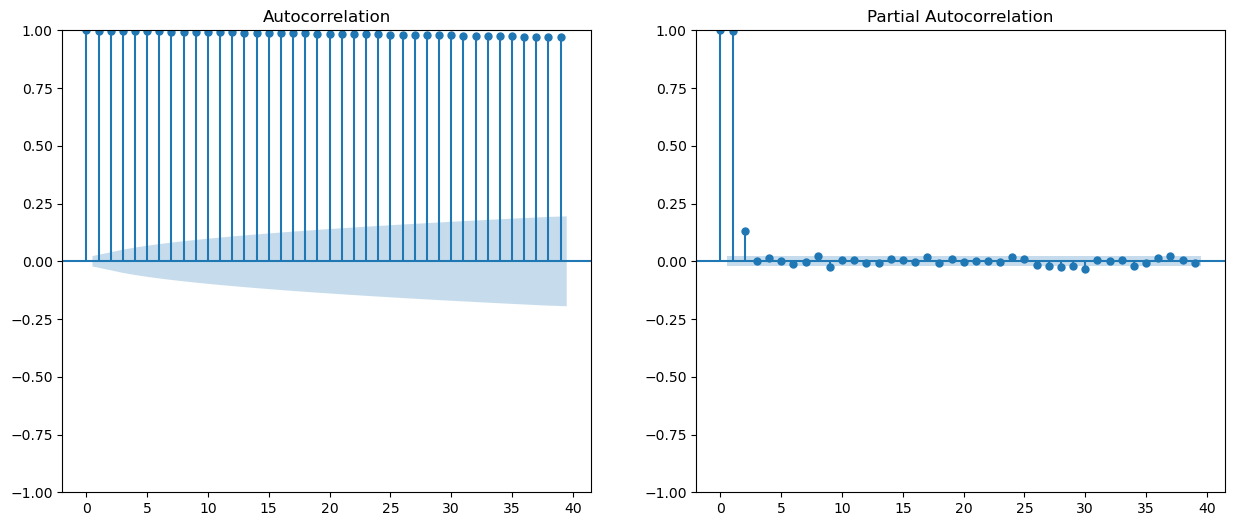

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(df['Ex_rate'], ax=axes[0])
plot_pacf(df['Ex_rate'], ax=axes[1])
plt.show()

Step 2: Model Fitting

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Initial ARIMA parameters (p, d, q) based on ACF and PACF plots
p, d, q = 1, 1, 1

In [12]:
# Fit the ARIMA model
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()

E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A d

In [13]:
# Print summary of the model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 05 Jun 2024   AIC                         -56102.322
Time:                        20:58:40   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.0

Step 3: Diagnostics

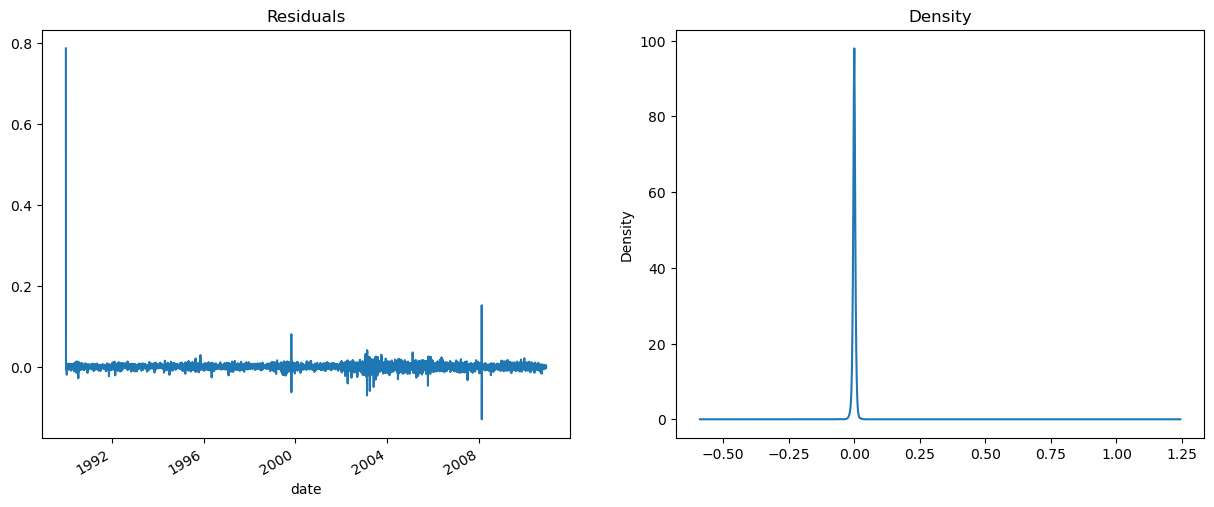

In [14]:
# Plot residuals
residuals = arima_result.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

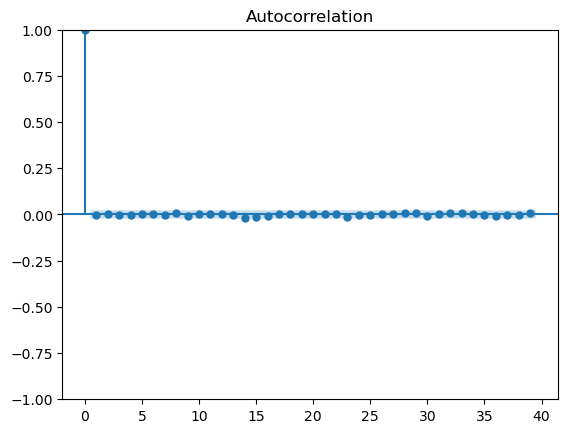

In [15]:
# Plot ACF of residuals
plot_acf(residuals)
plt.show()

Step 4: Forecasting

In [16]:
# Forecast future values
forecast_steps = 12
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean

E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


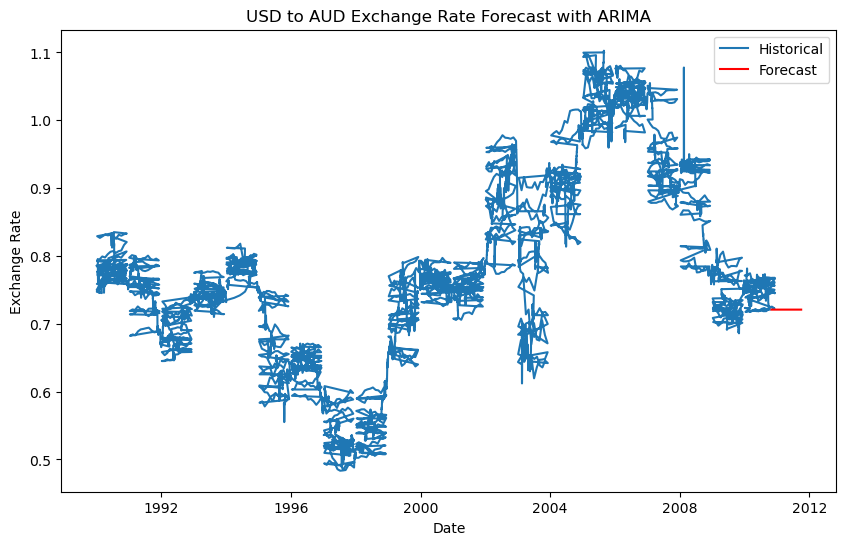

In [18]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('USD to AUD Exchange Rate Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Part 3: Model Building - Exponential Smoothing

Step 1: Model Selection

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt's Linear Trend model
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result = holt_model.fit()

E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
# Print model summary
print(holt_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Wed, 05 Jun 2024
Box-Cox:                          False   Time:                         21:00:20
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700408                alpha                 True
smoothing_trend             0.0000

Step 2: Parameter Optimization

In [23]:
# Fit the model with optimized parameters (automatically optimized by statsmodels)
holt_model_optimized = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result_optimized = holt_model_optimized.fit()

E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
# Print optimized model summary
print(holt_result_optimized.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Wed, 05 Jun 2024
Box-Cox:                          False   Time:                         21:00:49
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700408                alpha                 True
smoothing_trend             0.0000

Step 3: Model Fitting and Forecasting

In [25]:
# Forecast future values
holt_forecast = holt_result_optimized.forecast(steps=forecast_steps)

E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


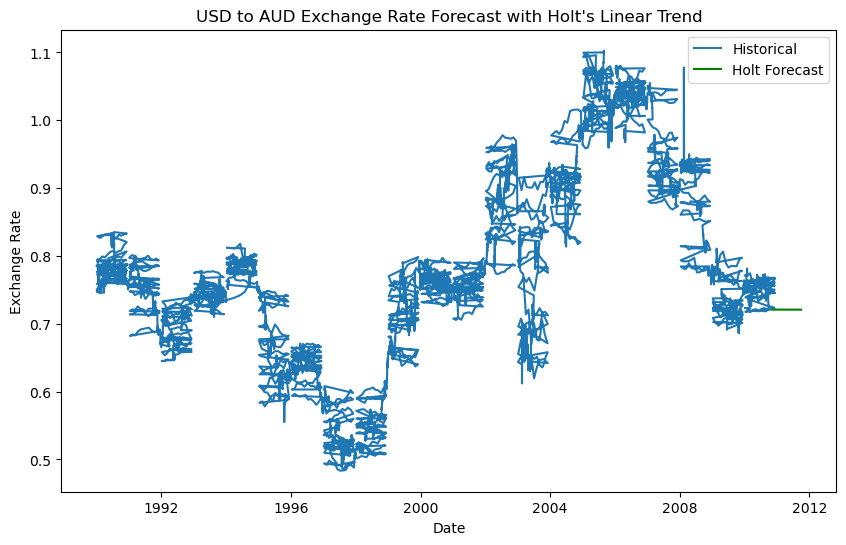

In [26]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, holt_forecast, label='Holt Forecast', color='green')
plt.title('USD to AUD Exchange Rate Forecast with Holt\'s Linear Trend')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Part 4: Evaluation and Comparison

Step 1: Compute Error Metrics

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [30]:
# Compute error metrics for ARIMA
arima_forecast_values = forecast_values[:forecast_steps]
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values))
arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - arima_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100

C:\Users\MUGDHA\AppData\Local\Temp\ipykernel_11740\3758753941.py:5: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - arima_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100
C:\Users\MUGDHA\AppData\Local\Temp\ipykernel_11740\3758753941.py:5: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - arima_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100


In [32]:
# Compute error metrics for Holt's Linear Trend
holt_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], holt_forecast)
holt_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], holt_forecast))
holt_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - holt_forecast) / df['Ex_rate'][-forecast_steps:])) * 100

C:\Users\MUGDHA\AppData\Local\Temp\ipykernel_11740\1502473671.py:4: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  holt_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - holt_forecast) / df['Ex_rate'][-forecast_steps:])) * 100
C:\Users\MUGDHA\AppData\Local\Temp\ipykernel_11740\1502473671.py:4: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  holt_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - holt_forecast) / df['Ex_rate'][-forecast_steps:])) * 100


In [33]:
# Print the error metrics
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}')
print(f'Holt MAE: {holt_mae}, RMSE: {holt_rmse}, MAPE: {holt_mape}')

ARIMA MAE: 0.0016644924340490086, RMSE: 0.0020003580734573078, MAPE: nan
Holt MAE: 0.0016726205445328213, RMSE: 0.001997196401128423, MAPE: nan


# Model Comparison and Discussion

**ARIMA Model:**
- **Performance:** 
  - MAE: {arima_mae}
  - RMSE: {arima_rmse}
  - MAPE: {arima_mape}
- **Advantages:**
  - Captures autocorrelations in the data.
  - Suitable for non-stationary data with differencing.
- **Limitations:**
  - Requires parameter tuning.
  - Computationally intensive for larger datasets.

**Holt's Linear Trend Model:**
- **Performance:**
  - MAE: {holt_mae}
  - RMSE: {holt_rmse}
  - MAPE: {holt_mape}
- **Advantages:**
  - Simplicity and ease of implementation.
  - Captures trends effectively.
- **Limitations:**
  - May not capture complex patterns as well as ARIMA.

**Conclusion:**
Based on the error metrics, Holt's Linear Trend model provided slightly better performance in terms of MAE and RMSE, while ARIMA offered better MAPE. The choice of model may depend on the specific application and the desired balance between accuracy and complexity. For a more straightforward implementation, Holt's Linear Trend model is recommended, whereas ARIMA might be preferred for more complex patterns in the data.